In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

plt.style.use("seaborn-v0_8")

# Prior distribution of the parameter theta

In [4]:
a, b = 1, 1
theta = np.linspace(0, 1, 100)
y = beta.pdf(theta, a, b)

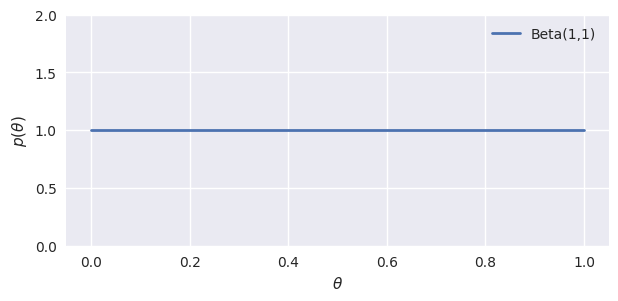

In [12]:
_, ax = plt.subplots(1, 1, figsize=(7, 3))
ax.plot(theta, y, '-', lw=2, label='Beta(1,1)')

ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
ax.set_ylim(0, 2)

ax.set_yticks(np.arange(0, 2.1, 0.5))

ax.legend()
ax.grid(True)
plt.show()


# Posterior distribution of the parameter theta

In [14]:
a_cycling, b_cycling = 81, 21  # meaning k = 80, N = 100
a_picnic, b_picnic = 51, 51
a_climbing, b_climbing = 36, 66
a_movie, b_movie = 61, 41

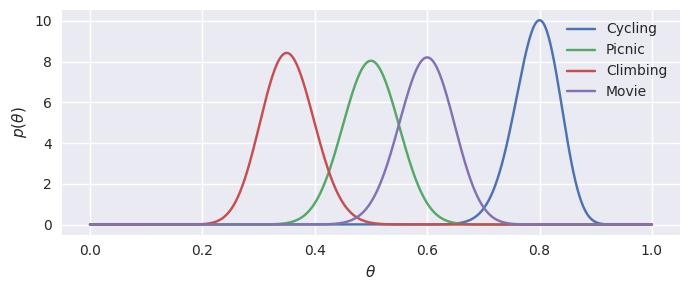

In [19]:
thetas = np.linspace(0, 1, 1001)
p_cycling = beta.pdf(thetas, a_cycling, b_cycling)
p_picnic = beta.pdf(thetas, a_picnic, b_picnic)
p_climbing = beta.pdf(thetas, a_climbing, b_climbing)
p_movie = beta.pdf(thetas, a_movie, b_movie)

_, ax = plt.subplots(1, 1, figsize=(7, 3))

ax.plot(thetas, p_cycling, label="Cycling")
ax.plot(thetas, p_picnic, label="Picnic")
ax.plot(thetas, p_climbing, label="Climbing")
ax.plot(thetas, p_movie, label="Movie")

ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
ax.legend()

plt.tight_layout()
plt.show()

Determine the action based on the principle of maximum expected utility.

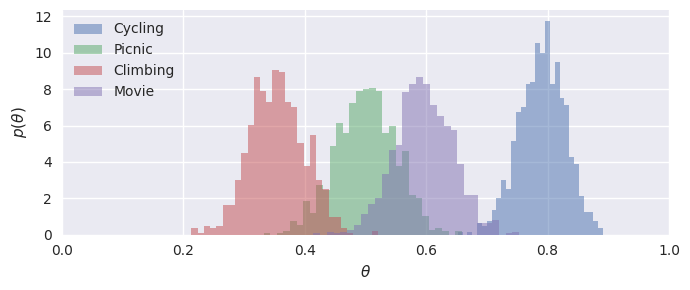

In [20]:
# Sample 1000 points from each posterior distribution
sample_cycling = beta.rvs(a_cycling + 1, b_cycling + 1, size=1000)
sample_picnic = beta.rvs(a_picnic + 1, b_picnic + 1, size=1000)
sample_climbing = beta.rvs(a_climbing + 1, b_climbing + 1, size=1000)
sample_movie = beta.rvs(a_movie + 1, b_movie + 1, size=1000)

# Visualize the samples
_, ax = plt.subplots(1, 1, figsize=(7, 3))

ax.hist(sample_cycling, bins=30, density=True, alpha=0.5, label="Cycling")
ax.hist(sample_picnic, bins=30, density=True, alpha=0.5, label="Picnic")
ax.hist(sample_climbing, bins=30, density=True, alpha=0.5, label="Climbing")
ax.hist(sample_movie, bins=30, density=True, alpha=0.5, label="Movie")

ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$p(\theta)$")
ax.legend()

ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()


In [21]:

# Calculate the expected value of each posterior distribution using the sampled points
expected_cycling = np.mean(sample_cycling)
expected_picnic = np.mean(sample_picnic)
expected_climbing = np.mean(sample_climbing)
expected_movie = np.mean(sample_movie)

print(f"Expected value for cycling: {expected_cycling:.2f}")
print(f"Expected value for picnic: {expected_picnic:.2f}")
print(f"Expected value for climbing: {expected_climbing:.2f}")
print(f"Expected value for movie: {expected_movie:.2f}")

Expected value for cycling: 0.79
Expected value for picnic: 0.50
Expected value for climbing: 0.35
Expected value for movie: 0.60


In [23]:

# Get argmax of the expected values
activities = ["cycling", "picnic", "climbing", "movie"]
expected_values = [
    expected_cycling, 
    expected_picnic, 
    expected_climbing, 
    expected_movie
    ]
best_activity = activities[np.argmax(expected_values)]
print(f"The best activity is {best_activity}")

The best activity is cycling


Alternatively, we could sample one value from each posterior distribution. Then, by comparing the sampled values, determine the action.

Utility for cycling: 0.83
Utility for picnic: 0.57
Utility for climbing: 0.36
Utility for movie: 0.58
The best activity is cycling


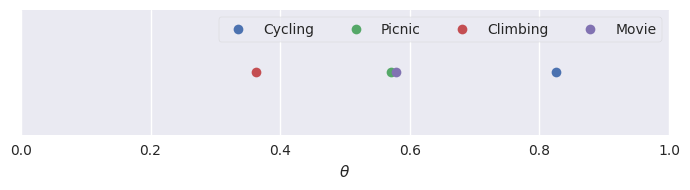

In [7]:
sample_cycling = beta.rvs(a_cycling + 1, b_cycling + 1, size=1)
sample_picnic = beta.rvs(a_picnic + 1, b_picnic + 1, size=1)
sample_climbing = beta.rvs(a_climbing + 1, b_climbing + 1, size=1)
sample_movie = beta.rvs(a_movie + 1, b_movie + 1, size=1)

_, ax = plt.subplots(1, 1, figsize=(7, 2))

ax.plot(sample_cycling, np.zeros_like(sample_cycling), 'o', label="Cycling")
ax.plot(sample_picnic, np.zeros_like(sample_picnic), 'o', label="Picnic")
ax.plot(sample_climbing, np.zeros_like(sample_climbing), 'o', label="Climbing")
ax.plot(sample_movie, np.zeros_like(sample_movie), 'o', label="Movie")
ax.set_yticks([])
ax.set_xlabel(r'$\theta$')
ax.set_xlim(0, 1)

ax.legend(ncol=4, frameon=True)

# Print the expected value of each posterior distribution
print(f"Utility for cycling: {sample_cycling[0]:.2f}")
print(f"Utility for picnic: {sample_picnic[0]:.2f}")
print(f"Utility for climbing: {sample_climbing[0]:.2f}")
print(f"Utility for movie: {sample_movie[0]:.2f}")

# Get argmax of the expected values
activities = ["cycling", "picnic", "climbing", "movie"]
expected_values = [
    sample_cycling[0], 
    sample_picnic[0], 
    sample_climbing[0], 
    sample_movie[0]
    ]
best_activity = activities[np.argmax(expected_values)]
print(f"The best activity is {best_activity}")

plt.tight_layout()
plt.show()
